# SARIMA
- about SARIMA: https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/
- data: https://www.mhlw.go.jp/stf/covid-19/open-data.html

## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-02-15 23:40:43--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 65.9.42.103, 65.9.42.72, 65.9.42.42, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|65.9.42.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103844 (101K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 101.41K  --.-KB/s    in 0.03s   

2022-02-15 23:40:44 (3.22 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [103844/103844]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(761, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,99629,4098,469,189,713,216,232,463,1484,875,...,230,300,4659,470,572,940,455,319,590,699
2022-02-11,98319,3683,491,187,759,221,262,440,1703,661,...,233,310,4842,375,497,889,432,278,571,643
2022-02-12,68424,3280,370,184,592,130,115,307,1681,570,...,116,204,3456,426,248,594,336,196,444,334
2022-02-13,77395,2692,280,145,672,149,118,356,1180,631,...,248,271,4112,305,386,566,365,235,461,549
2022-02-14,60085,2252,173,107,393,97,153,242,1121,573,...,127,152,2972,416,291,575,283,162,348,286


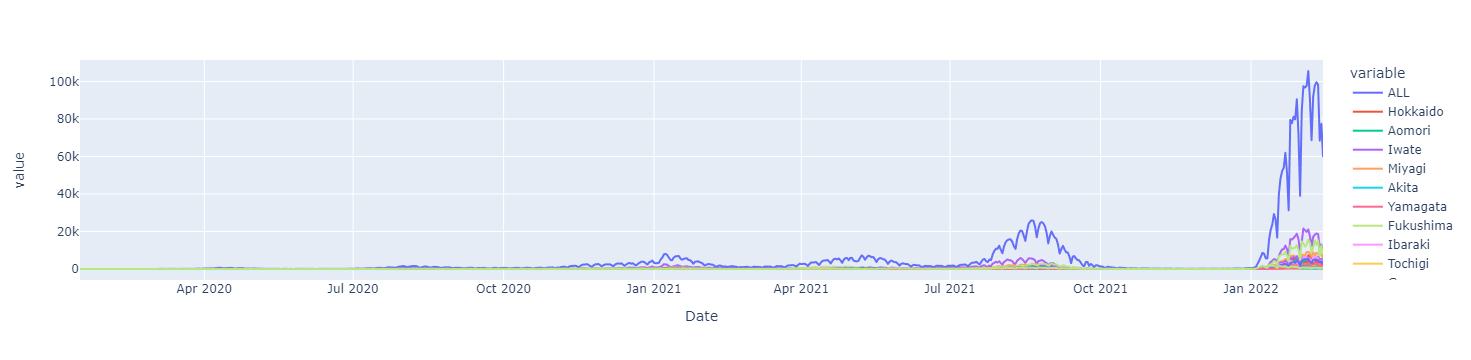

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(109, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-16,18151.428571,367.142857,74.571429,12.571429,58.285714,21.000000,28.571429,41.714286,227.000000,148.000000,...,121.000000,19.285714,664.142857,107.857143,118.000000,245.857143,62.285714,67.285714,80.857143,1380.428571
2022-01-23,46292.000000,1226.857143,185.571429,30.142857,186.000000,47.142857,61.285714,87.571429,641.428571,341.000000,...,222.714286,53.571429,1989.000000,225.285714,323.571429,530.428571,225.571429,242.857143,248.571429,1178.285714
2022-01-30,73165.285714,2226.000000,239.857143,118.000000,451.857143,200.857143,173.285714,302.714286,990.285714,583.714286,...,273.428571,139.142857,3285.714286,360.571429,390.571429,622.571429,341.857143,377.857143,465.571429,996.428571
2022-02-06,87343.142857,3178.285714,363.857143,140.428571,609.000000,178.285714,267.571429,488.714286,1212.428571,786.285714,...,267.857143,212.285714,4424.142857,476.142857,522.857143,828.285714,414.428571,348.571429,597.571429,642.285714
2022-02-13,86037.857143,3275.000000,394.142857,161.428571,681.285714,182.142857,200.000000,417.714286,1475.285714,704.714286,...,212.857143,247.714286,4296.285714,444.285714,421.428571,771.000000,403.428571,254.857143,552.142857,559.571429


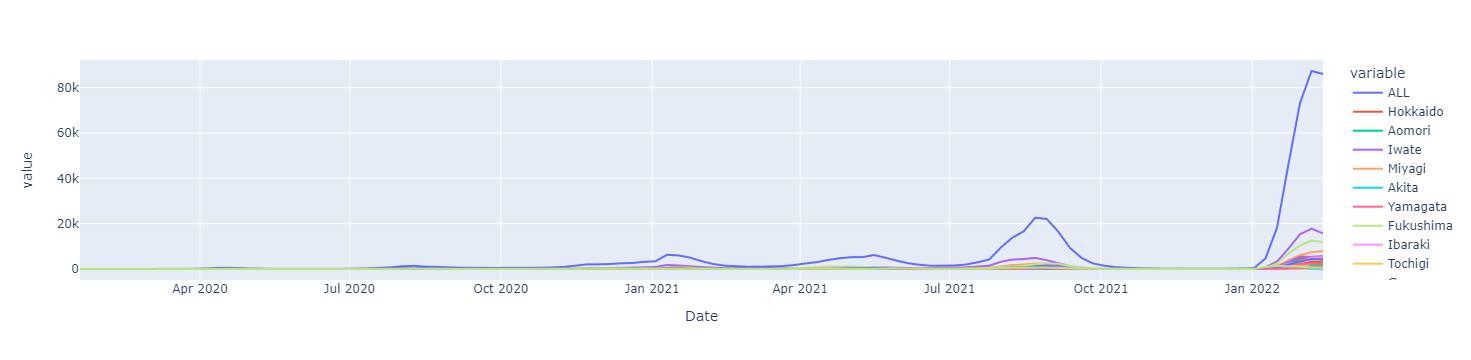

In [7]:
px.line(df_gr,)

## functions

In [8]:
import itertools

# 各パラメータの範囲を決める
p = d = q = range(1, 2)
P = D = Q = range(1, 2)
s = range(4, 32)

# p, d, q　の組み合わせを列挙するリストを作成
pdq = list(itertools.product(p, d, q))
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
#PDQs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(P, D, Q, s))]

In [9]:
import warnings

warnings.filterwarnings("ignore") # warnings を表示させないようにする

def gridSearch(ts_train):
    best_params = [0, 0, 10000000]
    best_result = None
    for order in pdq:
        for seasonal_order in PDQs:
            try:
                model = SARIMAX(ts_train,
                              order = order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=True,
                              enforce_invertibility=True)

                result = model.fit(disp=False)

                if result.aic < best_params[2] and not result.aic < 100:
                    best_params = [order, seasonal_order, result.aic]
                    best_result = result
                    print('order{}, s_order{} - AIC: {}'.format(order, seasonal_order, result.aic))
            except KeyboardInterrupt:
                print('KeyboardInterrupt')
                return
            except:
                print('ERROR! Cannot fit! order{}, s_order{}'.format(order, seasonal_order))
                continue

    print('Best AIC model:', best_params)
    
    return best_result

In [10]:
%%time
result_all = gridSearch(df_gr.ALL)

order(1, 1, 1), s_order(1, 1, 1, 12) - AIC: 1764.0312410372676
Best AIC model: [(1, 1, 1), (1, 1, 1, 12), 1764.0312410372676]
CPU times: user 3.97 s, sys: 13.8 s, total: 17.7 s
Wall time: 1.5 s


In [11]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.ALL, order=order, seasonal_order=seasonal_order)
result_all = model.fit(disp=False)
result_all.aic

1764.0312410372676

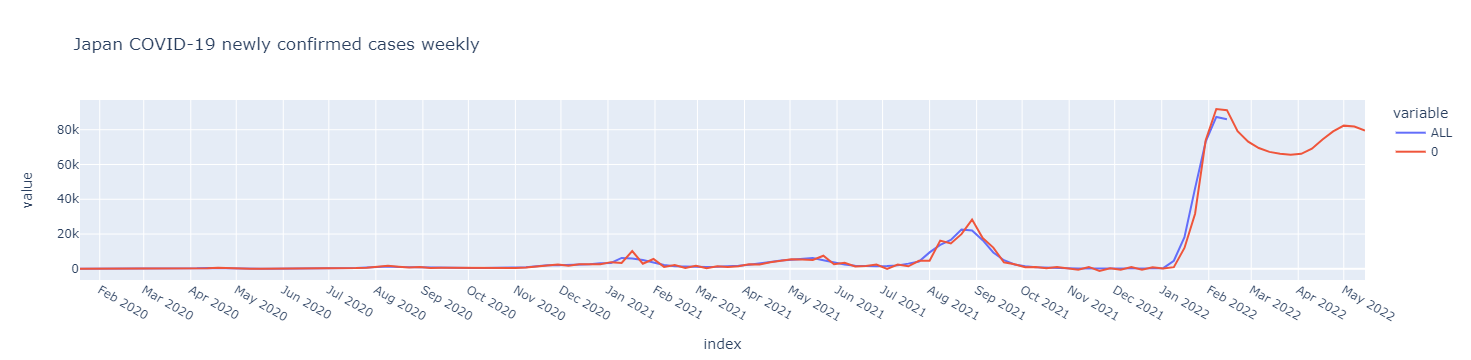

In [12]:
ts_forecast = result_all.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))

temp_df = df_gr.ALL.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])
fig = px.line(temp_df, title='Japan COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()

## SARIMA - Tokyo

In [13]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.Tokyo, order=order, seasonal_order=seasonal_order)
result_tokyo = model.fit(disp=False)
result_tokyo.aic

1508.6313588392973

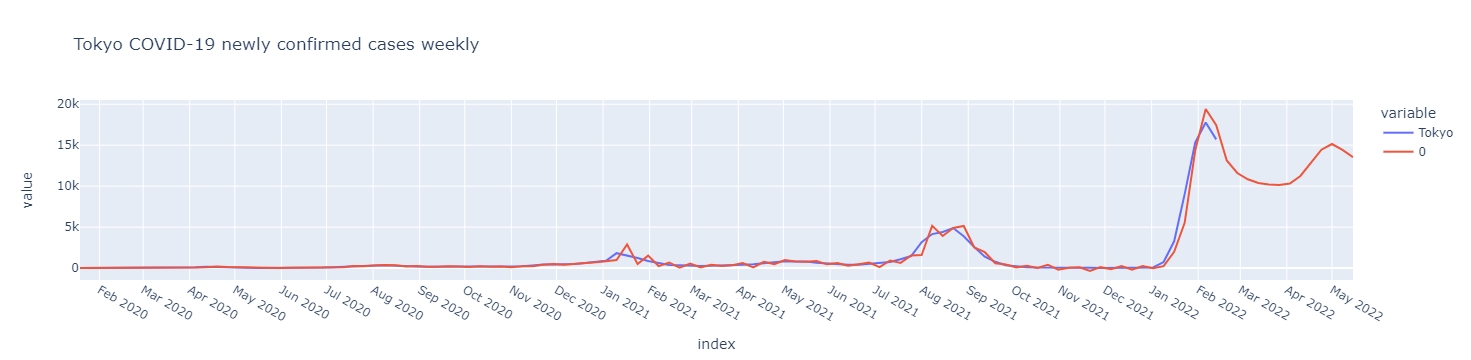

In [14]:
ts_forecast = result_tokyo.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))
temp_df = df_gr.Tokyo.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])

fig = px.line(temp_df, title='Tokyo COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()